# Muthu Palaniappan M - 21011101079 - CIA - 1 - Machine Learning

# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Loading Dataset

In [2]:
data = pd.read_csv("DataSet/Swarm_Behaviour.csv")#reading the dataset
data.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.0,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.0,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.3,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.0,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.0,12,0,0.0


# Task

- Binary Classification, classify the behaviour of the swarm.
- Class labels are binary, which 1 refers to flocking, grouped, and aligned, and 0 refers to not flocking, not grouped, and not aligned.

- Target Variable: Swarm_Behaviour
- Data Type: High Dimensional
- Classification Type: Binary Classificarion

# Getting Information about the dataset

In [3]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23309 entries, 0 to 23308
Columns: 2401 entries, x1 to Swarm_Behaviour
dtypes: float64(2001), int64(400)
memory usage: 427.0 MB


In [4]:
#getting shape
print(f"Records:{data.shape[0]}\nFeatures:{data.shape[1]}")

Records:23309
Features:2401


In [5]:
#getting the count of datatypes of the features
data.dtypes.value_counts()

float64    2001
int64       400
dtype: int64

# Machine Learning Pipeline

### Checking for the missing values

In [6]:
#getting null values
data.isna().any().value_counts()

False    2401
dtype: int64

- There is no null values present in the dataset

### Checking Mathematical inference

In [7]:
data.describe()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
count,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,...,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000
mean,104.413631,-73.481853,-0.697607,0.061480,-0.147964,0.152034,-1.055732,-0.731546,-0.034915,0.077123,...,0.086824,-0.126276,0.127497,-1.526260,-0.118891,-0.012388,0.085076,26.433995,2.130679,0.341242
std,843.200079,573.329374,6.427840,7.366739,0.376078,0.588582,26.388570,20.684183,0.559690,0.628478,...,7.683539,0.378830,0.570589,73.903764,7.002853,0.555143,0.614603,34.136098,7.431911,0.474136
min,-1414.140000,-1012.180000,-18.590000,-18.410000,-1.000000,-1.000000,-944.070000,-847.910000,-2.680000,-2.680000,...,-18.440000,-1.040000,-1.000000,-4079.230000,-370.240000,-2.680000,-2.680000,0.000000,0.000000,0.000000
25%,-542.020000,-611.220000,-5.360000,-5.680000,-0.230000,-0.010000,0.000000,0.000000,-0.040000,-0.020000,...,-5.600000,-0.190000,0.000000,0.000000,0.000000,-0.070000,0.000000,2.000000,0.000000,0.000000
50%,145.300000,-157.350000,-0.450000,-1.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
75%,896.200000,425.700000,3.940000,7.260000,0.000000,0.940000,0.000000,0.000000,0.000000,0.020000,...,7.480000,0.000000,0.540000,0.000000,0.000000,0.000000,0.030000,35.000000,1.000000,1.000000
max,1406.080000,1015.800000,18.470000,18.570000,1.000000,1.040000,68.560000,234.740000,2.680000,2.680000,...,18.490000,1.000000,1.040000,255.990000,57.840000,2.680000,2.680000,142.000000,64.000000,1.000000


### Checking for the class Imbalance Problem

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Swarm_Behaviour', ylabel='count'>

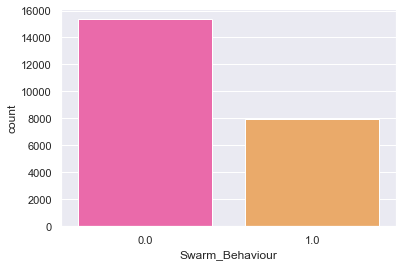

In [8]:
sns.countplot(data['Swarm_Behaviour'],palette='spring')

- Class imbalance problem exists in the following dataset

### Resampling

- removing samples from the majority class (under-sampling) 
- adding more examples from the minority class (over-sampling).

#### NearMiss Sampling Technique
- NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance, this will make the majority class equal to the minority class.

In [9]:
x = data.drop(columns='Swarm_Behaviour',axis=1)
y = data['Swarm_Behaviour']

In [10]:
NM = NearMiss()
x_nm,y_nm = NM.fit_resample(x,y)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


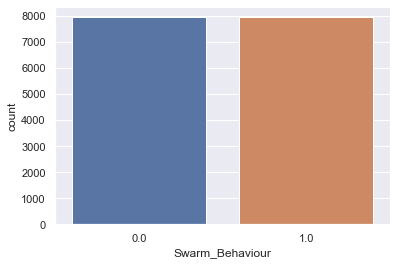

In [11]:
#distribution of Swarm_Behavioour feature varible in the re-sample dataset
sns.countplot(y_nm);

In [12]:
print(f"Orginal Shape : {Counter(y)}\nResample Shape : {Counter(y_nm)}")

Orginal Shape : Counter({0.0: 15355, 1.0: 7954})
Resample Shape : Counter({0.0: 7954, 1.0: 7954})


- Class Balancing is acheived

### Dimensionality Reduction Technique
- Principal component analysis (PCA)

##### Feature-scalling

In [13]:
SS = StandardScaler()
x_nm = SS.fit_transform(x_nm)

### Records - Train test spilt

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x_nm,y_nm,test_size=0.3,random_state=0)

- Test Size = 70% Training and 30% Testing
- random_state = Seed Value - 0

In [15]:
print(f"Training Shape : {x_train.shape}\nTesting Shape : {y_train.shape}")

Training Shape : (11135, 2400)
Testing Shape : (11135,)


### Model Building

#### 1- Logistic Regression

In [16]:
LR = LogisticRegression()
LR.fit(x_train,y_train) #model fitting
y_pred = LR.predict(x_test)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Accuracy metrics

In [17]:
LR_acc = accuracy_score(y_pred,y_test)*100
print(f"Accuracy Score : {LR_acc}")

Accuracy Score : 82.77812696417347


##### Classification Report

In [18]:
#classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83      2368
         1.0       0.83      0.83      0.83      2405

    accuracy                           0.83      4773
   macro avg       0.83      0.83      0.83      4773
weighted avg       0.83      0.83      0.83      4773



<AxesSubplot:>

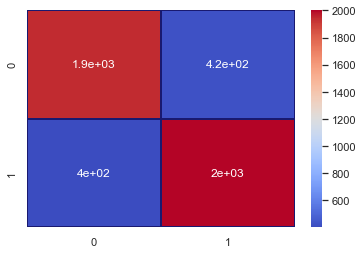

In [19]:
#confusion matrix
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,linewidths=0.2,cmap='coolwarm',linecolor='midnightblue')

##### AUC & ROC Curve

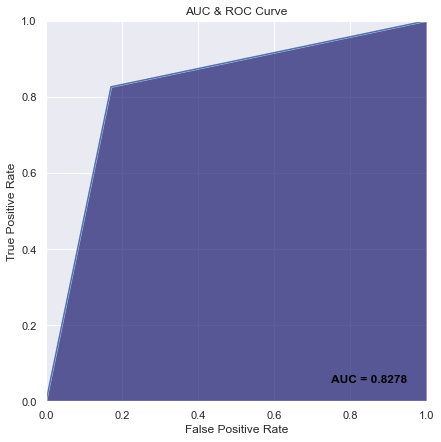

In [20]:
auc = roc_auc_score(y_test,y_pred)
fp_rate,tp_rate,thresholds = roc_curve(y_test,y_pred)
plt.figure(figsize=(15,7))
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fp_rate, tp_rate, 'b')
plt.fill_between(fp_rate, tp_rate, facecolor='midnightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### KNN

In [21]:
def KNN_best_parameters(x_train,x_test,y_train,y_test):
    
    k_range = list(range(1,10)) 
    weight_options = ['uniform','distance'] 
    #manhattan_distance = 1
    #euclidean_distance = 2
    distance_options = [1,2] 
    print()
    param_grid = dict(n_neighbors=k_range,weights=weight_options,p=distance_options) 

    knn =KNeighborsClassifier() 
    grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy') 
    grid.fit(x_train, y_train) 
    
    print('Best training score: {} with parametres: {}'.format(grid.best_score_,grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_) 
    knn.fit(x_train, y_train)
    
    y_predict_test = knn.predict(x_test)
    y_predict_train = knn.predict(x_train)

    cm_test = confusion_matrix(y_test,y_predict_test)
    cm_train = confusion_matrix(y_train,y_predict_train)

    acc_test = accuracy_score(y_test,y_predict_test)  
    acc_train = accuracy_score(y_train,y_predict_train)

    print('Test Score: {}, Train Score: {}'.format(acc_test,acc_train))
    print()
    print('CM Test:',cm_test)
    print('CM Train:',cm_train)
    
    return grid

In [22]:
KNN = KNeighborsClassifier(n_neighbors=5)
y_pred = KNN.fit(x_train,y_train).predict(x_test)
y_pred

array([0., 1., 1., ..., 0., 1., 0.])

### Accuracy Metrices

In [23]:
#Accuracy_Score
KNN_acc = accuracy_score(y_pred,y_test)*100
print(f"Accuracy Score : {KNN_acc}")

Accuracy Score : 83.84663733500943


In [24]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84      2387
         1.0       0.83      0.85      0.84      2386

    accuracy                           0.84      4773
   macro avg       0.84      0.84      0.84      4773
weighted avg       0.84      0.84      0.84      4773



<AxesSubplot:>

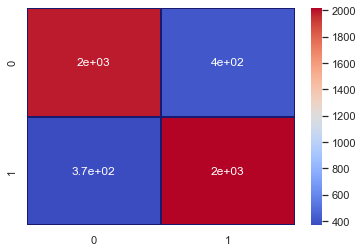

In [25]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,linecolor='midnightblue',linewidths=0.2,cmap='coolwarm')

### Decision-Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier(random_state = 0)
regressor.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [35]:
y_pred = regressor.predict(x_test)

In [36]:
y_pred

array([0., 1., 1., ..., 0., 1., 0.])

In [38]:
print(f"Accuracy Score : {accuracy_score(y_pred,y_test)}")

Accuracy Score : 0.8162581185837


<AxesSubplot:>

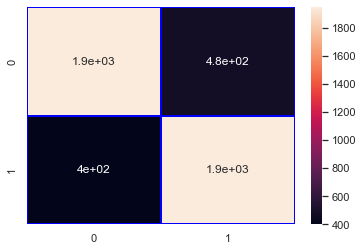

In [42]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,linecolor='blue',linewidths=0.2)

In [43]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.82      2425
         1.0       0.80      0.83      0.82      2348

    accuracy                           0.82      4773
   macro avg       0.82      0.82      0.82      4773
weighted avg       0.82      0.82      0.82      4773

